In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

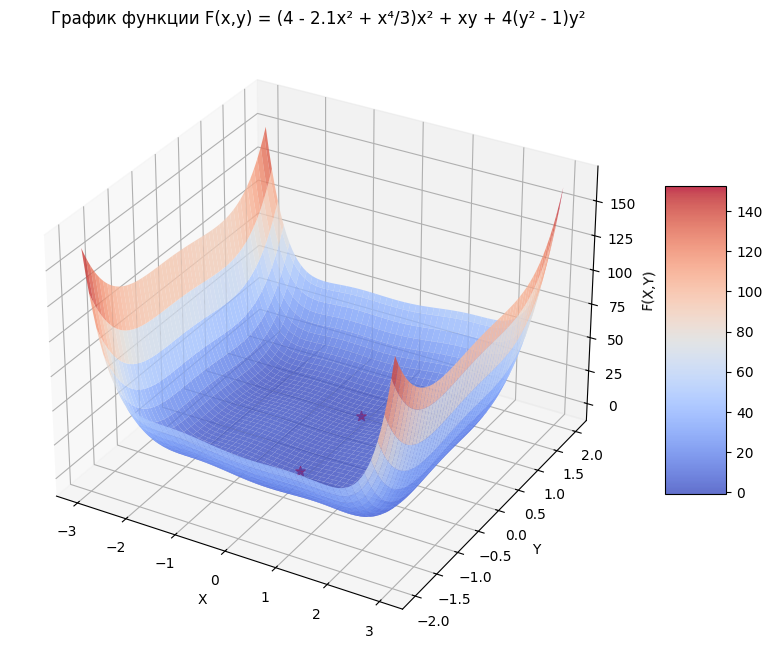

In [7]:
# Определение целевой функции
def target_function(x, y):
    return (4 - 2.1*x**2 + (x**4)/3)*x**2 + x*y + 4*(y**2 - 1)*y**2

# Создание сетки для построения графика
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = target_function(X, Y)

# Построение 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.8)

# Отметка известных глобальных минимумов
min_points = [(0.0898, 0.713, -1.03), (0.0898, -0.713, -1.03)]
for point in min_points:
    ax.scatter(point[0], point[1], point[2], color='red', s=50, marker='*')

# Настройка графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(X,Y)')
ax.set_title('График функции F(x,y) = (4 - 2.1x² + x⁴/3)x² + xy + 4(y² - 1)y²')
plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

In [8]:
# Параметры для стохастического поиска
N = 10000  # Число случайных точек

# Границы поиска
a = np.array([-3, -2])  # нижние границы для x и y
b = np.array([3, 2])    # верхние границы для x и y
M = 2                   # размерность задачи (x, y)

# Шаг 1: Генерация N случайных точек
X = np.zeros((N, M))
for i in range(N):
    for k in range(M):
        # Генерация случайного числа в интервале (0, 1)
        xi = np.random.random()
        # Преобразование в нужный диапазон
        X[i, k] = a[k] + (b[k] - a[k]) * xi

# Шаг 2: Вычисление значений функции в сгенерированных точках
F_values = np.zeros(N)
for i in range(N):
    x, y = X[i]
    F_values[i] = target_function(x, y)

# Шаг 3: Определение минимального значения и соответствующей точки
min_idx = np.argmin(F_values)
x_min_stochastic = X[min_idx, 0]
y_min_stochastic = X[min_idx, 1]
f_min_stochastic = F_values[min_idx]

print("Результаты простого стохастического поиска:")
print(f"Минимум функции: F({x_min_stochastic:.4f}, {y_min_stochastic:.4f}) = {f_min_stochastic:.4f}")

Результаты простого стохастического поиска:
Минимум функции: F(-0.1003, 0.7319) = -1.0283


In [9]:
# Параметры для метода имитации отжига
T = 50.0        # Начальная температура
T_min = 0.001   # Минимальная температура
v = 0.99        # Скорость понижения температуры

# Шаг 1 и Шаг 2: Инициализация начальных значений
# Случайные начальные приближения в области поиска
x_0 = a[0] + (b[0] - a[0]) * np.random.random()
y_0 = a[1] + (b[1] - a[1]) * np.random.random()
X_current = np.array([x_0, y_0])  # Текущая точка
l = 0  # Счетчик итераций

# Текущее значение функции
F_current = target_function(X_current[0], X_current[1])

# История поиска для анализа
history = []
history.append((X_current.copy(), F_current))

# Лучшее найденное решение
X_best = X_current.copy()
F_best = F_current

# Основной цикл метода имитации отжига
while T > T_min:
    l += 1
    
    # Шаг 3: Генерация новых приближений
    X_new = np.zeros(M)
    
    # Пробуем сгенерировать новую точку, удовлетворяющую ограничениям
    valid_point = False
    attempts = 0
    max_attempts = 100  # Максимальное количество попыток
    
    while not valid_point and attempts < max_attempts:
        for k in range(M):
            # Генерация случайных чисел
            z_k = np.random.normal()  # Нормальное распределение N(0,1)
            xi_k = np.random.random() # Равномерное распределение (0,1)
            
            # Использование формулы (8.2) для ускорения сходимости
            X_new[k] = X_current[k] + z_k * T * ((1 + l/T)**(2*xi_k - 1) - 1)
            
        # Проверка граничных условий
        if (a[0] < X_new[0] < b[0]) and (a[1] < X_new[1] < b[1]):
            valid_point = True
        
        attempts += 1
    
    # Если не удалось сгенерировать подходящую точку, уменьшаем температуру и продолжаем
    if not valid_point:
        T *= v
        continue
    
    # Шаг 4: Вычисление значений функции и оценка перехода
    F_new = target_function(X_new[0], X_new[1])
    delta_E = F_new - F_current
    
    # Если новое решение лучше, принимаем его
    if delta_E < 0:
        X_current = X_new.copy()
        F_current = F_new
        
        # Обновляем лучшее решение при необходимости
        if F_new < F_best:
            X_best = X_new.copy()
            F_best = F_new
    else:
        # Шаг 5: Вероятностный переход к худшему решению
        P = np.exp(-delta_E / T)
        if np.random.random() < P:
            X_current = X_new.copy()
            F_current = F_new
    
    # Сохранение истории
    history.append((X_current.copy(), F_current))
    
    # Шаг 6: Понижение температуры
    T *= v

# Результаты метода имитации отжига
x_min_annealing = X_best[0]
y_min_annealing = X_best[1]
f_min_annealing = F_best

print("\nРезультаты метода имитации отжига:")
print(f"Минимум функции: F({x_min_annealing:.4f}, {y_min_annealing:.4f}) = {f_min_annealing:.4f}")


Результаты метода имитации отжига:
Минимум функции: F(0.0949, -0.7141) = -1.0315


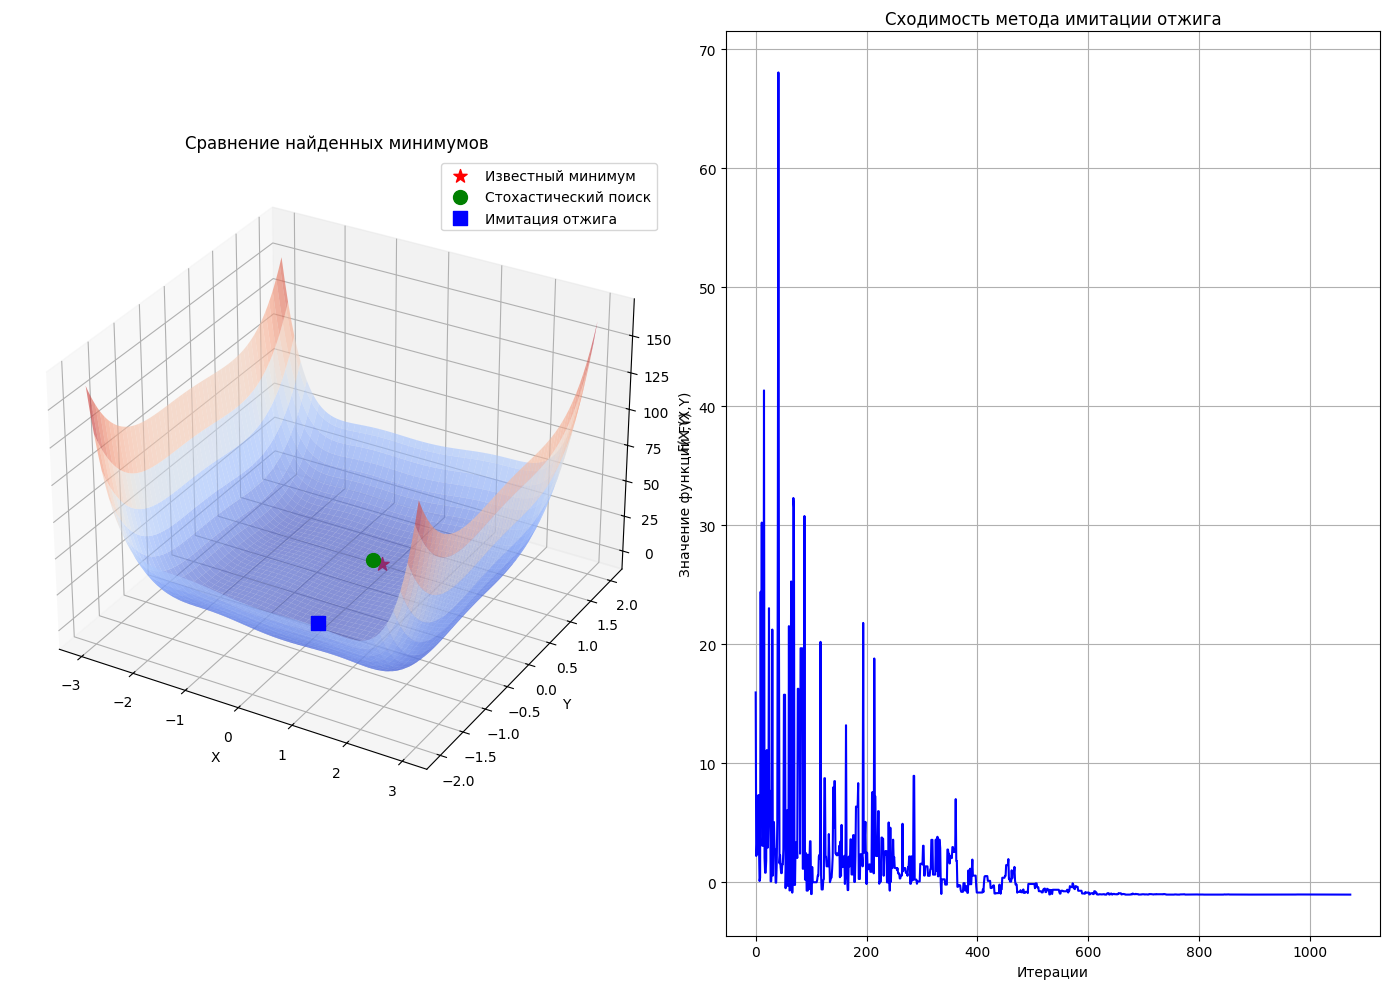


Сравнение результатов:
------------------------------------------------------------
| Метод                | Координаты (x, y)     | Значение F(x,y) |
------------------------------------------------------------
| Известный минимум 1 | (0.0898, 0.7130) | -1.0300 |
| Известный минимум 2 | (0.0898, -0.7130) | -1.0300 |
| Стохастический поиск | (-0.1003, 0.7319) | -1.0283 |
| Имитация отжига     | (0.0949, -0.7141) | -1.0315 |
------------------------------------------------------------

Относительная погрешность стохастического поиска: 0.16%
Относительная погрешность метода имитации отжига: 0.15%


In [10]:
# Известные глобальные минимумы
known_minima = [(0.0898, 0.713, -1.03), (0.0898, -0.713, -1.03)]

# Заново создаем сетку для графика - это важно!
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = target_function(X, Y)

# Визуализация результатов и трассировки метода имитации отжига
fig = plt.figure(figsize=(14, 10))

# График функции с найденными минимумами
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6)

# Отметка известных глобальных минимумов (красные звезды)
for point in known_minima:
    ax1.scatter(point[0], point[1], point[2], color='red', s=100, marker='*')

# Добавляем метки только один раз для легенды
ax1.scatter([], [], [], color='red', s=100, marker='*', label='Известный минимум')
ax1.scatter(x_min_stochastic, y_min_stochastic, f_min_stochastic, color='green', s=100, marker='o', label='Стохастический поиск')
ax1.scatter(x_min_annealing, y_min_annealing, f_min_annealing, color='blue', s=100, marker='s', label='Имитация отжига')

# Настройка графика
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('F(X,Y)')
ax1.set_title('Сравнение найденных минимумов')
ax1.legend()

# График сходимости метода имитации отжига
ax2 = fig.add_subplot(122)
history_array = np.array([(h[0][0], h[0][1], h[1]) for h in history])
ax2.plot(range(len(history_array)), history_array[:, 2], 'b-')
ax2.set_xlabel('Итерации')
ax2.set_ylabel('Значение функции F(X,Y)')
ax2.set_title('Сходимость метода имитации отжига')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Таблица сравнения результатов
print("\nСравнение результатов:")
print("-" * 60)
print("| Метод                | Координаты (x, y)     | Значение F(x,y) |")
print("-" * 60)
print(f"| Известный минимум 1 | ({known_minima[0][0]:.4f}, {known_minima[0][1]:.4f}) | {known_minima[0][2]:.4f} |")
print(f"| Известный минимум 2 | ({known_minima[1][0]:.4f}, {known_minima[1][1]:.4f}) | {known_minima[1][2]:.4f} |")
print(f"| Стохастический поиск | ({x_min_stochastic:.4f}, {y_min_stochastic:.4f}) | {f_min_stochastic:.4f} |")
print(f"| Имитация отжига     | ({x_min_annealing:.4f}, {y_min_annealing:.4f}) | {f_min_annealing:.4f} |")
print("-" * 60)

# Расчет отклонений от известного минимума
stochastic_error = abs(f_min_stochastic - (-1.03)) / 1.03 * 100
annealing_error = abs(f_min_annealing - (-1.03)) / 1.03 * 100

print(f"\nОтносительная погрешность стохастического поиска: {stochastic_error:.2f}%")
print(f"Относительная погрешность метода имитации отжига: {annealing_error:.2f}%")